In [1]:
import numpy as np
import pandas as pd 

<img src="images/image3.png" width="600" height="400" />

In [2]:
# We toss the globe 9 times and these are our observations
sample = ["W", "L", "W", "W", "W", "L", "W", "L", "W"]

w = sample.count("W") # Number of water observations
l = sample.count("L") # Number of land observations

# Having a 4-sided globe, all kinds of water proportions
proportions = [0, 0.25, 0.5, 0.75, 1]

df = pd.DataFrame()
for i, p in enumerate(proportions):
    
    # Ways to produce the sample
    ways = (4*p)**w * (4*(1-p))**l
    
    # Possible proportions and ways to produce the sample given the proportions
    row = pd.DataFrame({"poss": p, "ways": ways}, index=[i])
    df = pd.concat([df, row])
    
# Posterior Probability
df["post"] = (df["ways"] / df["ways"].sum()).round(2)

# A sample bar plot
df["bars"] = df["ways"].apply(lambda n: round((n / df["ways"].sum()) * 10) * "#")
df

,poss,ways,post,bars
0,0.00,0.0,0.00,
1,0.25,27.0,0.02,
2,0.50,512.0,0.40,####
3,0.75,729.0,0.57,######
4,1.00,0.0,0.00,


--------------------------------------------------------

<img src="images/image4.png" width="600" height="400" />

In [17]:
def sim_globe(p=0.7, N=9):
    """ Simulating tossing the globe and W/L observations
    
    Args:
        p (float, optional): The proportion of water.
        N (int, optional): Number of times tossing the globe.
        
    Returns:
        sample_list: list of all W/L observations.
    """
    sample = np.random.choice(["W", "L"], size=N, p=[p, 1-p], replace=True)
    sample_list = list(sample)
    return sample_list

In [20]:
p = 0.6
N = 10
sample = sim_globe(p, N)
print(f"Sample: {sample}")
print(f"Proportion of water: {sample.count('W') / N}")

Sample: ['L', 'W', 'W', 'W', 'L', 'W', 'W', 'L', 'W', 'W']
Proportion of water: 0.7


In [5]:
# Replicating for 10 times
for i in range(10):
    sample = sim_globe(p, N)
    print(f"{i}: {sample} | W: {sample.count('W')}, L: {sample.count('L')}")

0: ['W', 'W', 'W', 'L', 'L', 'L', 'W', 'W', 'L', 'W'] | W: 6, L: 4
1: ['L', 'W', 'L', 'L', 'L', 'W', 'W', 'L', 'W', 'W'] | W: 5, L: 5
2: ['L', 'W', 'W', 'W', 'W', 'L', 'L', 'L', 'L', 'W'] | W: 5, L: 5
3: ['W', 'L', 'L', 'L', 'W', 'L', 'L', 'W', 'L', 'W'] | W: 4, L: 6
4: ['L', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'W', 'W'] | W: 6, L: 4
5: ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'W'] | W: 8, L: 2
6: ['W', 'W', 'L', 'W', 'W', 'W', 'W', 'L', 'L', 'W'] | W: 7, L: 3
7: ['W', 'W', 'L', 'W', 'W', 'W', 'W', 'L', 'L', 'L'] | W: 6, L: 4
8: ['W', 'W', 'L', 'W', 'W', 'L', 'L', 'W', 'L', 'L'] | W: 5, L: 5
9: ['L', 'W', 'W', 'W', 'L', 'L', 'W', 'L', 'L', 'W'] | W: 5, L: 5


#### Test of extreme setting

In [6]:
# If we set p=1 we should only observe L and for p=0 we should only observe L
p = 1
N = 11
sample = sim_globe(p, N)
print(sample)

['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [7]:
# For large samples the proportion of in the sample should be very close to p
p = 0.5
N = int(1e4)
sample = sim_globe(p, N)
print(f"Proportion: {sample.count('W') / N}")

Proportion: 0.4931


<img src="images/image6.png" width="600" height="400" />

In [22]:
def compute_posterior(the_sample, poss=[0, 0.25, 0.5, 0.75, 1]):
    """
    Compute the posterior probabilities of different proportions based on the given sample.

    Parameters:
    the_sample (str): A string of 'W' and 'L' characters representing wins and losses respectively.
    poss (list): A list of possible proportions of winning (default is [0, 0.25, 0.5, 0.75, 1]).

    Returns:
    pd.DataFrame: A DataFrame containing the possible proportions, ways to produce the sample,
                  posterior probabilities, and a visual bar plot representation.
    """
    
    # Count occurrences of 'W' and 'L' in the sample
    w = the_sample.count("W")
    l = the_sample.count("L")
    
    # Initialize an empty DataFrame to store results
    df = pd.DataFrame()

    # Loop over each possible proportion in poss
    for i, p in enumerate(poss):
        # Calculate the number of ways to produce the sample given the proportion p
        ways = (4 * p) ** w * (4 * (1 - p)) ** l

        # Create a new DataFrame row with the proportion and the ways to produce the sample
        row = pd.DataFrame({"poss": p, "ways": ways}, index=[i])
        
        # Append the row to the main DataFrame
        df = pd.concat([df, row])
    
    # Calculate the posterior probability by normalizing the 'ways' column
    df["post"] = (df["ways"] / df["ways"].sum()).round(2)

    # Create a visual representation of the posterior probabilities using bar plots
    df["bars"] = df["ways"].apply(lambda n: round((n / df["ways"].sum()) * 10) * "#")
    
    return df

In [9]:
p = 0.6
N = 10
sample = sim_globe(p, N)

print(f"The Sample: {sample}")
print(f"Proportion: {sample.count('W') / N}")

compute_posterior(the_sample=sample)

The Sample: ['L', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L']
Proportion: 0.7


,poss,ways,post,bars
0,0.00,0.0,0.00,
1,0.25,27.0,0.01,
2,0.50,1024.0,0.32,###
3,0.75,2187.0,0.68,#######
4,1.00,0.0,0.00,


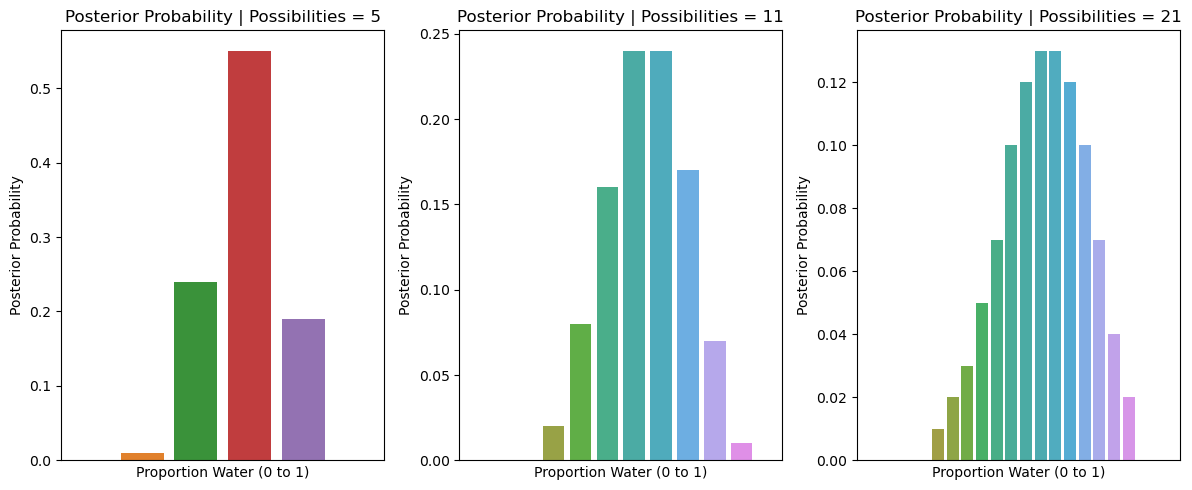

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

p = 0.6
N = 10
sample = sim_globe(p, N)


fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for i, num in enumerate([5, 11, 21]):
    poss = [i * 1/num for i in range(num+1)]
    post_df = compute_posterior(the_sample=sample, poss=poss)
    post_df = post_df.round(2)

    sns.barplot(data=post_df, x="poss", y="post", ax=axs[i])

    axs[i].set_title(f'Posterior Probability | Possibilities = {num}')
    axs[i].set_xticks(ticks=[], labels=[])
    axs[i].set_xlabel('Proportion Water (0 to 1)')
    axs[i].set_xlabel
    axs[i].set_ylabel('Posterior Probability')

plt.tight_layout()
plt.show()

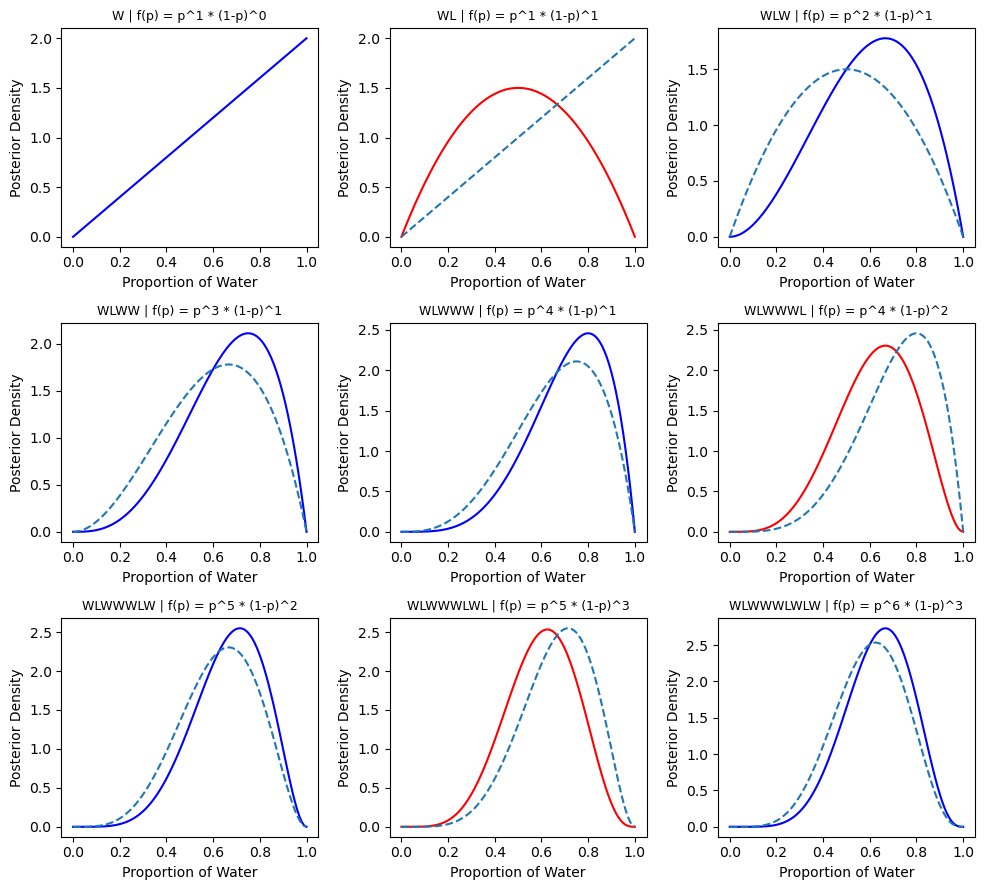

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

sample = "WLWWWLWLW"

# Porportion of water
p = np.linspace(0, 1, 100)

fig, axs = plt.subplots(3, 3, figsize=(10, 9))
W, L = 0, 0

prev_post = None
for i, (s, ax) in enumerate(zip(sample, axs.flatten())):
    if s == "W":
        color = "blue"
        W += 1
    else:
        color = "red"
        L += 1

    # Calculate the posterior probability
    posterior = factorial(W + L + 1) / (factorial(W) * factorial(L)) * p**W * (1 - p)**L
    ax.plot(p, posterior, color=color)

    if prev_post is not None:
        ax.plot(p, prev_post, linestyle='--')
    
    ax.set_xlabel("Proportion of Water")
    ax.set_ylabel("Posterior Density")
    ax.set_title(f"{sample[:i+1]} | f(p) = p^{W} * (1-p)^{L}", fontsize=9)
    prev_post = posterior

plt.tight_layout()
plt.show()

### Note:
#### We observe that the every W pushes the plot to the right to have larger proportion of water and L pushes to the left.

--------------------------------

<img src="images/image15.png" width="800" height="600" />

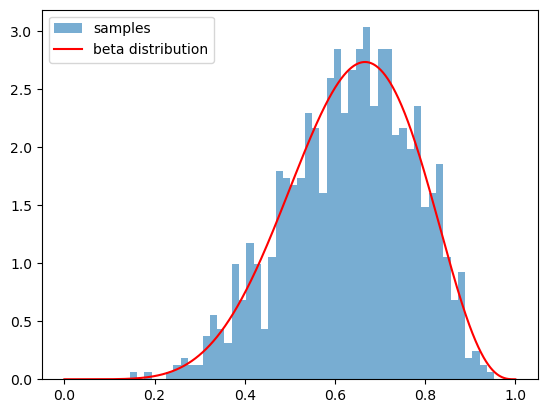

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Number of samples
num_samples = 1000

# Parameters for the beta distribution
alpha = 6
beta = 3

# Generating samples from the beta distribution
sample_p = np.random.beta(alpha+1, beta+1, num_samples)

# Generating a range of p values from 0 to 1
p_values = np.linspace(0, 1, 1000)

# Calculating the whole distribution
whole_dist = factorial(alpha + beta + 1) / (factorial(alpha) * factorial(beta)) * p_values**(alpha) * (1 - p_values)**(beta)

# Plotting a histogram of the samples
plt.hist(sample_p, bins=50, density=True, alpha=0.6, label='samples')

# Plotting the theoretical distribution
plt.plot(p_values, whole_dist, 'r-', label='beta distribution')

plt.legend()
plt.show()

### Posterior Predictive Distribution

<img src="images/image19.png" width="800" height="600" />

### Understanding Alpha and Beta in the Beta Distribution

The Beta distribution is a continuous probability distribution defined on the interval [0, 1]. It is often used as a prior distribution for the probability parameter of a Bernoulli or binomial distribution in Bayesian statistics. The Beta distribution is parameterized by two positive shape parameters, \(\alpha\) (alpha) and \(\beta\) (beta), which influence the shape of the distribution.

#### The Beta Distribution Formula

The probability density function (pdf) of the Beta distribution is given by:
\[ 
f(x; \alpha, \beta) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)} 
\]

where:
- \( x \) is the variable (in the range [0, 1]).
- \(\alpha\) and \(\beta\) are the shape parameters.
- \( B(\alpha, \beta) \) is the Beta function, which serves as a normalization constant to ensure that the total area under the pdf is 1.

#### Interpretation of Alpha and Beta

- **Alpha (\(\alpha\))**: This parameter can be thought of as representing the number of "successes" plus 1. A higher \(\alpha\) value means that the distribution is skewed towards higher values of \( x \). In other words, it indicates stronger prior belief in more successes.
- **Beta (\(\beta\))**: This parameter can be thought of as representing the number of "failures" plus 1. A higher \(\beta\) value means that the distribution is skewed towards lower values of \( x \). It indicates a stronger prior belief in more failures.

#### Influence on the Shape of the Distribution

- **When \(\alpha = \beta = 1\)**: The Beta distribution becomes a uniform distribution over [0, 1], meaning all values are equally likely.
- **When \(\alpha > \beta\)**: The distribution is skewed towards 1, indicating a higher likelihood of success.
- **When \(\alpha < \beta\)**: The distribution is skewed towards 0, indicating a higher likelihood of failure.
- **When \(\alpha\) and \(\beta\) are both greater than 1**: The distribution becomes bell-shaped and is centered around \(\frac{\alpha}{\alpha + \beta}\).
- **When \(\alpha\) and \(\beta\) are both less than 1**: The distribution becomes U-shaped, with higher probabilities near 0 and 1.

#### Example: Alpha = 6, Beta = 3

In your code, \(\alpha = 6\) and \(\beta = 3\), meaning you are working with a Beta distribution where:
- There is a stronger prior belief in observing successes (W).
- The mean of the distribution is \(\frac{\alpha}{\alpha + \beta} = \frac{6}{6 + 3} = \frac{6}{9} = \frac{2}{3} \approx 0.67\).

This indicates that, based on the prior information, you expect the probability of success (W) to be around 67%. The generated posterior samples are then used to predict the number of successes in 10 future trials, considering this prior belief.

### Summary

- **Alpha (\(\alpha\)) and Beta (\(\beta\))** are shape parameters of the Beta distribution.
- They influence the shape and skewness of the distribution.
- The values \(\alpha = 6\) and \(\beta = 3\) suggest a prior belief that success (W) is more likely than failure (L), with an expected success rate of around 67%.

By incorporating these parameters into your simulations, you are able to generate posterior samples that reflect your prior beliefs and use these samples to make predictions about future outcomes.

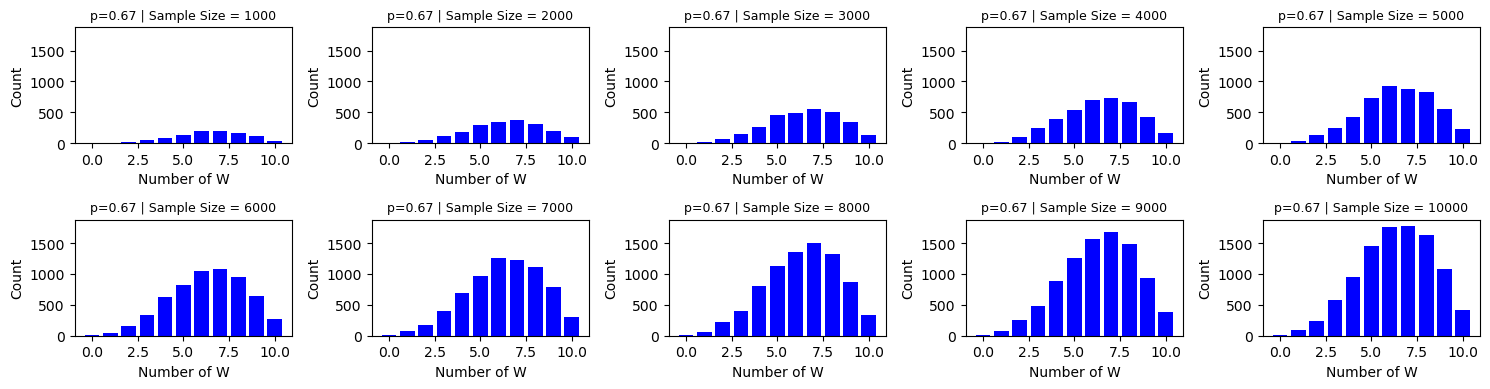

In [53]:
def beta_posterior_predictive(alpha, beta, ax, n_trials=10, size=10000):
    # Generate posterior samples from the Beta distribution
    post_samples = np.random.beta(alpha + 1, beta + 1, size)

    # Initializing an array to hold the counts of 'W' in the predictive distributions
    counts = np.zeros(n_trials + 1)

    for p in post_samples:
        # Generating a predictive distribution using the sim_globe function
        pred_dist = sim_globe(p, n_trials)

        # Counting the number of 'W' in the predictive distribution
        count_W = pred_dist.count('W')

        # Adding to the corresponding count in the counts array 
        counts[count_W] += 1

    # Plot the counts
    ax.bar(range(n_trials + 1), counts, color='blue')
    ax.set_xlabel('Number of W')
    ax.set_ylabel('Count')
    ax.set_title(f'p={alpha/(alpha+beta):0.2f} | Sample Size = {size}', fontsize=9)
    
    return counts

alpha = 6
beta = 3
step_size = 1000
fig, axs = plt.subplots(2, 5, figsize=(15, 4))

all_counts = []
for i, sample_size in enumerate(range(step_size, step_size*10 + 1, step_size)):
    ax = axs[i//5, i%5]
    counts = beta_posterior_predictive(alpha, beta, ax, n_trials=10, size=sample_size)
    all_counts.append(counts)


# Find the maximum count for y-axis limits
max_count = max([max(count) for count in all_counts]) + step_size // 10

# Set the same y-axis limit for all subplots
for ax in axs.flat:
    ax.set_ylim(0, max_count)
        
plt.tight_layout()
plt.show()

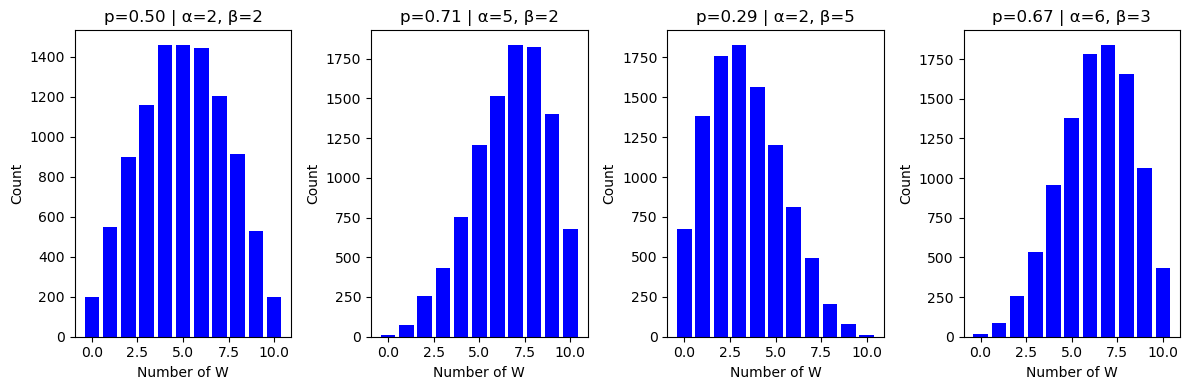

In [45]:
def beta_posterior_predictive(alpha, beta, ax, n_trials=10, size=10000):
    # Generate posterior samples from the Beta distribution
    post_samples = np.random.beta(alpha + 1, beta + 1, size)

    # Initializing an array to hold the counts of 'W' in the predictive distributions
    counts = np.zeros(n_trials + 1)

    for p in post_samples:
        # Generating a predictive distribution using the sim_globe function
        pred_dist = sim_globe(p, n_trials)

        # Counting the number of 'W' in the predictive distribution
        count_W = pred_dist.count('W')

        # Adding to the corresponding count in the counts array 
        counts[count_W] += 1

    # Plot the counts
    ax.bar(range(n_trials + 1), counts, color='blue')
    ax.set_xlabel('Number of W')
    ax.set_ylabel('Count')
    ax.set_title(f'p={alpha/(alpha+beta):0.2f} | α={alpha}, β={beta}')

# Test the function for four different alpha and beta combinations
alpha_beta_combinations = [
    (2, 2), # alpha = 2, beta = 2 => Normal Distribution
    (5, 2), # alpha = 5, beta = 2 => Right Skewed
    (2, 5), # alpha = 2, beta = 5 => Left Skewed
    (6, 3) # alpha = 6, beta = 3 => Right Skewed
]

fig, axs = plt.subplots(1, 4, figsize=(12, 4))

for i, (alpha, beta) in enumerate(alpha_beta_combinations):
    beta_posterior_predictive(alpha, beta, axs[i])

plt.tight_layout()
plt.show()